<a href="https://colab.research.google.com/github/RobertoAlessandri/CNN_DOA/blob/main/FeatureExtraction_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
from pathlib import Path
from tqdm import tqdm # Progress bar
import sklearn
plt.style.use('seaborn')

from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)

2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Extract audio data from a given list of filepaths assuming ordering wrt mics and sources
def extractAudiodata(filepaths, sample_len):
  sourcesDim = int(len(filepaths)/4)
  audioSignals = np.zeros([int(sample_len), 4, sourcesDim])
  sourceIDs = np.zeros([sourcesDim, 1])
  labels30 = np.zeros(sourceIDs.shape)
  labels10 = np.zeros(sourceIDs.shape)

  j = 0 # Indexing sources
  for i in tqdm(range(0, len(filepaths), 4)): # Indexing samples
    micsABCD = filepaths[i:i+4]

    # CHECKS ARE COMPUTATIONALLY DEMANDING
    # Checking if all microphones are present using the mic ID (A,B,C and D)
    #micIDs = [id.split('-')[-4] for id in micsABCD]
    #print(micIDs)
    #if micIDs != ['A', 'B', 'C', 'D']:
      #raise Exception("Filepaths are not ordered or aligned")

    # Checking if all the selected sample are from the same source using the source ID (from 0 to 5999 for the train dataset)
    #currentSourceIDs = [id.split('-')[-3] for id in micsABCD]
    #print(sourceIDs)
    #if len([True for id in currentSourceIDs if id == currentSourceIDs[0]]) != 4:
      #raise Exception("Filepaths are not ordered or aligned")
 
    for k in range(0, len(micsABCD)): # Indexing mics
      audioSignals[:, k, j] = librosa.load(micsABCD[k], sr=None)[0]

    fileid = micsABCD[0].split('.wav')[-2]
    sourceIDs[j] = fileid.split('-')[-3]
    labels30[j] = fileid.split('-')[-2]
    labels10[j] = fileid.split('-')[-1]
    j += 1


  return audioSignals, sourceIDs, labels30, labels10

In [ ]:
%cd /content/drive/MyDrive/Github/CNN_DOA/Dataset/TRAIN

/content/drive/.shortcut-targets-by-id/1-B6wbQJimyIAQNh3Ccp578yl6uudDF9j/CNN_DOA/Dataset/TRAIN


In [ ]:
# Get list of audio files in the current folder
audiofiles_train = [str(file) for file in Path().glob('SA*.wav')]

# Diminuisco un attimo la dimensione del dataset per gestirlo più velocemente
#audiofiles_train = audiofiles_train[:100]

sr = 16000
duration = 0.5

trainAudioMatrix, sourceIDs, labels30, labels10 = extractAudiodata(audiofiles_train, sr*duration) # At full load it took 14 mins with checks

100%|██████████| 6000/6000 [00:53<00:00, 112.63it/s]


In [ ]:
print(trainAudioMatrix.shape)
print(sourceIDs.shape)
print(labels30.shape)
print(labels10.shape)

(8000, 4, 6000)
(6000, 1)
(6000, 1)
(6000, 1)


In [ ]:
# Checking correct labeling
for i in range(0, 10):
  print('{} with id {}: \n Label resolution 30° --> {}     Label resolution 10° --> {}'.format(audiofiles_train[i*4], int(sourceIDs[i]), int(labels30[i]), int(labels10[i])))

SA23000-A-5750-2-7.wav with id 5750: 
 Label resolution 30° --> 2     Label resolution 10° --> 7
SA23004-A-5751-7-21.wav with id 5751: 
 Label resolution 30° --> 7     Label resolution 10° --> 21
SA23008-A-5752-4-13.wav with id 5752: 
 Label resolution 30° --> 4     Label resolution 10° --> 13
SA23012-A-5753-4-12.wav with id 5753: 
 Label resolution 30° --> 4     Label resolution 10° --> 12
SA23016-A-5754-8-23.wav with id 5754: 
 Label resolution 30° --> 8     Label resolution 10° --> 23
SA23020-A-5755-1-4.wav with id 5755: 
 Label resolution 30° --> 1     Label resolution 10° --> 4
SA23024-A-5756-6-18.wav with id 5756: 
 Label resolution 30° --> 6     Label resolution 10° --> 18
SA23028-A-5757-7-21.wav with id 5757: 
 Label resolution 30° --> 7     Label resolution 10° --> 21
SA23032-A-5758-9-28.wav with id 5758: 
 Label resolution 30° --> 9     Label resolution 10° --> 28
SA23036-A-5759-8-23.wav with id 5759: 
 Label resolution 30° --> 8     Label resolution 10° --> 23


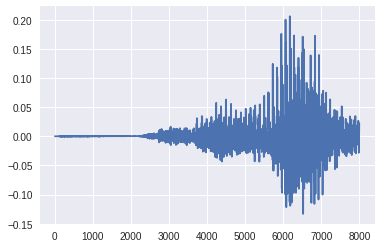

In [ ]:
ipd.display(ipd.Audio(trainAudioMatrix[:,0,0], rate=sr))
plt.plot(trainAudioMatrix[:,0,0])

In [ ]:
#%cd /content/drive/MyDrive/Github/CNN_DOA/Dataset/TEST


## Get a list of all audio files and get the class label for each file
#audiofiles_test = [str(file) for file in Path().glob('SA*.wav')]
#labels = []
#for i,file in enumerate(audiofiles_test):
#  fileid = file.split('.wav')[-2]
#  target = fileid.split('-')[-1]
#  labels.append(int(target))

In [ ]:
class_34_train = [str(file) for file in Path().glob('SA*-34.wav')]
class_15_train = [str(file) for file in Path().glob('SA*-15.wav')]

print('Number of class_0 examples: {}'.format(len(class_34_train)))
print('Number of class_1 examples: {}'.format(len(class_15_train)))

print('class_34 files:')
print(*class_34_train, sep='\n')


print('class_15 files:')
print(*class_15_train, sep='\n')

Number of class_0 examples: 2400
Number of class_1 examples: 1200
class_34 files:
SA23048-A-5762-11-34.wav
SA23049-B-5762-11-34.wav
SA23050-C-5762-11-34.wav
SA23051-D-5762-11-34.wav
SA23060-A-5765-11-34.wav
SA23061-B-5765-11-34.wav
SA23062-C-5765-11-34.wav
SA23063-D-5765-11-34.wav
SA23128-A-5782-11-34.wav
SA23129-B-5782-11-34.wav
SA23130-C-5782-11-34.wav
SA23131-D-5782-11-34.wav
SA23140-A-5785-11-34.wav
SA23141-B-5785-11-34.wav
SA23142-C-5785-11-34.wav
SA23143-D-5785-11-34.wav
SA23208-A-5802-11-34.wav
SA23209-B-5802-11-34.wav
SA23210-C-5802-11-34.wav
SA23211-D-5802-11-34.wav
SA23220-A-5805-11-34.wav
SA23221-B-5805-11-34.wav
SA23222-C-5805-11-34.wav
SA23223-D-5805-11-34.wav
SA23288-A-5822-11-34.wav
SA23289-B-5822-11-34.wav
SA23290-C-5822-11-34.wav
SA23291-D-5822-11-34.wav
SA23300-A-5825-11-34.wav
SA23301-B-5825-11-34.wav
SA23302-C-5825-11-34.wav
SA23303-D-5825-11-34.wav
SA23368-A-5842-11-34.wav
SA23369-B-5842-11-34.wav
SA23370-C-5842-11-34.wav
SA23371-D-5842-11-34.wav
SA23380-A-5845-11-

## Flow:
1) microphone signals

2) STFT 

3) Active SI estimation

4) Whitening weighting

In [ ]:
def featureExtractor(p_0, p_1, p_2, p_3):
  # STFT 3-1 for x axis, 4 -2 for y axis <- velocity
  d = 0.04
  ro = 1.225 
  Vx = []
  Vy = []

  p_0_len = len(p_0)
  p_1_len = len(p_1)
  p_2_len = len(p_2)
  p_3_len = len(p_3)

  signals_len = min([p_0_len, p_1_len, p_2_len, p_3_len])

  # In the next formulas of Vx and Vy is missing the division by the angular frequency
  for i in range(signals_len):
    Vx.append((librosa.stft(p_2[i], n_fft = 1024, hop_length = 512, center=False) - (librosa.stft(p_0[i], n_fft = 1024, hop_length = 512, center=False))).imag / (d*ro))
    Vy.append((librosa.stft(p_3[i], n_fft = 1024, hop_length = 512, center=False) - (librosa.stft(p_1[i], n_fft = 1024, hop_length = 512, center=False))).imag / (d*ro))
  
  # I can simply do the average of the STFT
  P_0 = []
  P_1 = []
  P_2 = []
  P_3 = []
  P0 = []
  for i in range(signals_len):
    P_0.append(librosa.stft(p_0[i], n_fft = 1024, hop_length = 512, center=False))
    P_1.append(librosa.stft(p_1[i], n_fft = 1024, hop_length = 512, center=False))
    P_2.append(librosa.stft(p_2[i], n_fft = 1024, hop_length = 512, center=False))
    P_3.append(librosa.stft(p_3[i], n_fft = 1024, hop_length = 512, center=False))
    P0.append((P_0[i] + P_1[i] + P_2[i] + P_3[i])/4)

  # I0x(omega,t) = P0(omega,t)*conj(Vx(omgea,t))
  I0x = []
  I0y = []
  for i in range(signals_len):
    I0x.append(P0[i]*Vx[i].conjugate())
    I0y.append(P0[i]*Vy[i].conjugate())

  # According to the theory on Sound Intensity (SI), only the real part (active 
  # intensity vector) contains the location information of a sound source.

  # Ix(omega,t) = Re{I0x(omgea,t)}
  Ix = []
  Iy = []
  for i in range(signals_len):
    Ix.append(I0x[i].real)
    Iy.append(I0y[i].real)

  # Whitening weighting 
  beta = 1e6
  W = []
  for i in range(signals_len):
    W.append((np.abs(P0[i])**2 + beta * (np.abs(Vx[i])**2 + np.abs(Vy[i])**2))**(1/2))

  # IxWeighted(omega,t) = Ix(omega,t)/weight
  IxW = []
  IyW = []
  for i in range(signals_len):
    IxW.append(Ix[i]/W[i])
    IyW.append(Iy[i]/W[i])

  return IxW, IyW



In [ ]:
a = np.eye(3)
print(a[0:2,:])

[[1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
def computeSI(X1, X2, X3, freqsMatrix, isOblique=False, X4=0,  d=0.04, rho=1.225, beta=1e6):
  denominator = (freqsMatrix + np.finfo(np.float32).eps)*d*rho

  if isOblique:
    X0 = (X1 + X2 + X3) / 3
    V1 = (np.sqrt(2)*1j*(X2 - X1)) / denominator
    V2 = (np.sqrt(2)*1j*(X2 - X3)) / denominator
  else:
    X0 = (X1 + X2 + X3 + X4) / 4
    V1 = (1j*(X3 - X1)) / denominator
    V2 = (1j*(X4 - X2)) / denominator

  W = (np.abs(X0)**2 + beta*(np.abs(V1)**2 + np.abs(V2)**2) )**0.5

  I1 = (np.real(X0*np.conj(V1)) / W).T
  I2 = (np.real(X0*np.conj(V2)) / W).T

  matrix = np.zeros([I1.shape[0], I1.shape[1], 2])
  matrix[:, :, 0] = I1
  matrix[:, :, 1] = I2

  #print('{} --> {}'.format(matrix[:,0,0], matrix[:,-1,0]))
  return matrix

In [ ]:
def featureExtractor2(micSignals, d=0.04, rho=1.225, NFFT=1024, sr=16000, beta=1e6):
  frame_length = NFFT
  hop_length = int(frame_length/2) 
  num_samples = micSignals[:,0].shape[0]
  num_frames = int(1 + np.floor((num_samples - frame_length) / hop_length))
  freqs = librosa.fft_frequencies(sr=sr, n_fft=NFFT) #/ (sr/2) * np.pi # Frequency, normalized, angular?
  #freqs = np.flip(freqs)
  freqs = np.reshape(freqs, (len(freqs),1))
  freqsMatrix = np.tile(freqs, (1, num_frames))
  #print(freqsMatrix)

  gamma = np.zeros([num_frames, int(NFFT/2 - 1), 10])
  #print(gamma.shape)

  P1 = librosa.stft(micSignals[:,0], n_fft = NFFT, hop_length = hop_length, win_length = frame_length, window='hann', center=False)
  P2 = librosa.stft(micSignals[:,1], n_fft = NFFT, hop_length = hop_length, win_length = frame_length, window='hann', center=False)
  P3 = librosa.stft(micSignals[:,2], n_fft = NFFT, hop_length = hop_length, win_length = frame_length, window='hann', center=False)
  P4 = librosa.stft(micSignals[:,3], n_fft = NFFT, hop_length = hop_length, win_length = frame_length, window='hann', center=False)

  # Principal directions
  gamma[:,:,0:2] = computeSI(P1, P2, P3, freqsMatrix, isOblique=False, X4=P4, d=d, rho=rho, beta=beta)[:,1:int(NFFT/2),0:2] # Using : last index is excluded
  
  # Subarrays
  gamma[:,:,2:4]  = computeSI(P4, P1, P2, freqsMatrix, isOblique=True, d=d, rho=rho, beta=beta)[:,1:int(NFFT/2),0:2]
  gamma[:,:,4:6]  = computeSI(P1, P2, P3, freqsMatrix, isOblique=True, d=d, rho=rho, beta=beta)[:,1:int(NFFT/2),0:2]
  gamma[:,:,6:8]  = computeSI(P2, P3, P4, freqsMatrix, isOblique=True, d=d, rho=rho, beta=beta)[:,1:int(NFFT/2),0:2]
  gamma[:,:,8:10] = computeSI(P3, P4, P1, freqsMatrix, isOblique=True, d=d, rho=rho, beta=beta)[:,1:int(NFFT/2),0:2]

  return gamma

/usr/local/lib/python3.7/dist-packages/librosa/util/utils.py:200: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  "on a non-contiguous input. This will result in a copy.".format(axis)


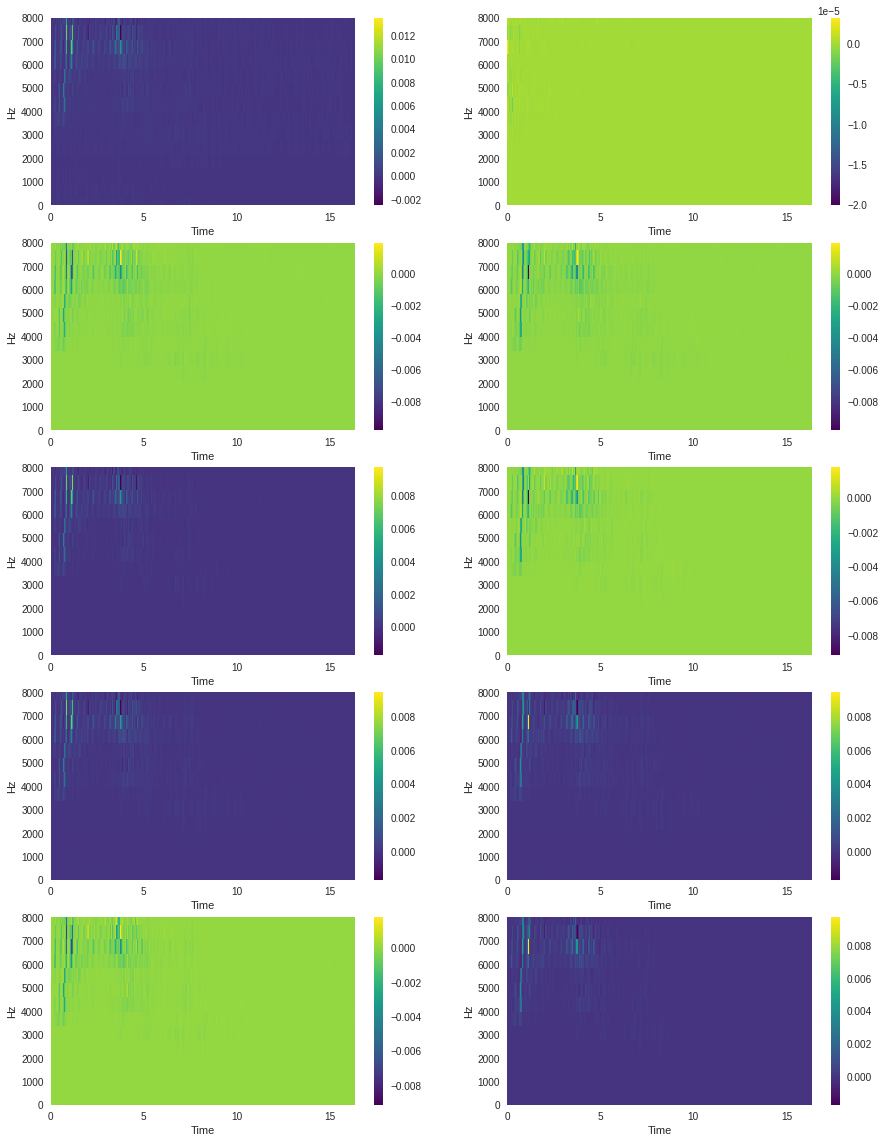

In [ ]:
#test(*(trainAudioMatrix[:,:,0].T))
gamma = featureExtractor2(trainAudioMatrix[:,:,0])
#print(np,abs(X[-1,:]))
plt.figure(figsize=(15, 20))
for i in range(0, 10):
  plt.subplot(5, 2, i+1)
  librosa.display.specshow(gamma[:,:,i], sr=sr, x_axis='time', y_axis='linear', cmap='viridis')
  plt.colorbar();

In [ ]:
trainAudioMatrix.shape
datapointsNum = trainAudioMatrix.shape[-1]
Gamma_container = np.zeros([datapointsNum, 14, 511, 10])
print(Gamma_container.shape)

for i in tqdm(range(0, datapointsNum)):
  Gamma_container[i,:,:,:] = featureExtractor2(trainAudioMatrix[:,:,i])

(6000, 14, 511, 10)


  0%|          | 0/6000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/librosa/util/utils.py:200: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  "on a non-contiguous input. This will result in a copy.".format(axis)
100%|██████████| 6000/6000 [01:29<00:00, 66.79it/s]


In [ ]:
a = np.random.rand(3,2)
print(a)
print(a.T)

[[0.66781923 0.9656893 ]
 [0.49148521 0.97390835]
 [0.76220162 0.18421506]]
[[0.66781923 0.49148521 0.76220162]
 [0.9656893  0.97390835 0.18421506]]


In [ ]:
a = np.matrix([[2,2], [2,2]])
b = np.ones([2,2])
c = b / a # good
d = a - b # good
e = np.matrix([[1],[2],[3]])
print(type(np.tile(e, (1,3))))

<class 'numpy.matrix'>


In [ ]:
4**(1/2)

2.0

In [ ]:
def stringToClassLabel(listclass):
  class_labels = []
  for i in range(len(listclass)):
    numbers = [int(number) for number in listclass[i].split('-') if number.isdigit()]
    #print(numbers[0])
    class_labels.append(numbers[-1])

  return class_labels

#numbers = []
#for word in a_string.split():
#   if word.isdigit():
#      numbers.append(int(word))


In [ ]:
def stringToSignal(listclass):
  mic_0 = []
  mic_1 = []
  mic_2 = []
  mic_3 = []
  for i in range(len(listclass)):
    if listclass[i].find("-0-", 3, 10) != -1 :
      mic_0.append(listclass[i])
    if listclass[i].find("-1-", 3, 10) != -1 :
      mic_1.append(listclass[i])
    if listclass[i].find("-2-", 3, 10) != -1 :
      mic_2.append(listclass[i])
    if listclass[i].find("-3-", 3, 10) != -1 :
      mic_3.append(listclass[i])  
  p_0 = list(librosa.load(p, None)[0] for p in mic_0)
  p_1 = list(librosa.load(p, None)[0] for p in mic_1)
  p_2 = list(librosa.load(p, None)[0] for p in mic_2)
  p_3 = list(librosa.load(p, None)[0] for p in mic_3)
  return p_0, p_1, p_2, p_3

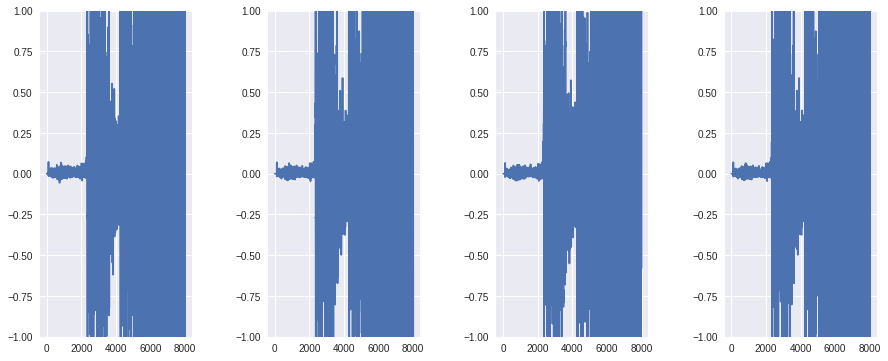

In [ ]:
p_0, p_1, p_2, p_3 = stringToSignal(audiofiles_train)
# Inspect one audio
plt.figure(figsize=(15,6))
plt.subplot(1,4,1)
plt.plot(p_0[30])
plt.ylim(-1, 1)
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,4,2)
plt.plot(p_1[30])
plt.ylim(-1, 1)
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,4,3)
plt.plot(p_2[30])
plt.ylim(-1, 1)
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,4,4)
plt.plot(p_3[30])
plt.ylim(-1, 1)
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)



In [ ]:
# The values are not the same because we need to have a new discriminator for microphone signals (letters)

print(len(p_0))
print(len(p_1))
print(len(p_2))
print(len(p_3))

1242
1239
1278
1203


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


Text(0.5, 1.0, 'IyW')

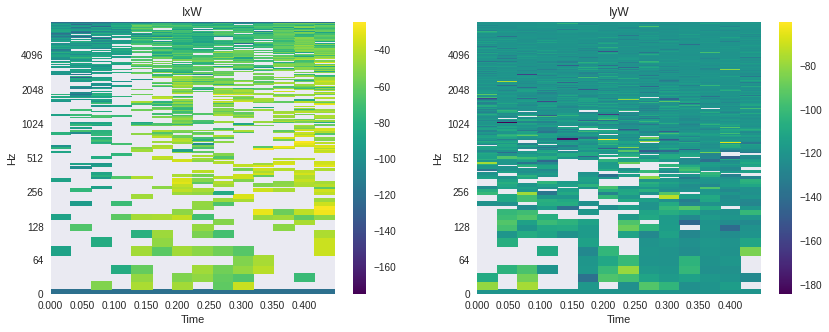

In [ ]:
IxW, IyW = featureExtractor(p_0, p_1, p_2, p_3)
# Inspect one feature
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)

# Put precision instead of 1e-6
librosa.display.specshow(20*np.log10(IxW[30] + 1e-6), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar()
plt.title('IxW')
plt.subplot(1,2,2)
librosa.display.specshow(20*np.log10(IyW[30] + 1e-6), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar()
plt.title('IyW')

In [ ]:
train_labels = stringToClassLabel(audiofiles_train)[0:4800:4]
print(len(train_labels))
print(train_labels[0:10])

1200
[2, 7, 4, 4, 8, 1, 6, 7, 9, 8]


In [ ]:
# Check on dimensionality

print(np.shape(p_0))
print(np.shape(p_0[0]))
print(np.shape(librosa.stft(p_0[0])))
print(np.shape(librosa.stft(p_0[0], n_fft = 1024, hop_length = 512, center=False)))


NameError: ignored

In [ ]:
(np.asarray(IxW).shape)

(1203, 513, 14)

In [ ]:
ipd.display(ipd.Audio(p_3[50], rate=sr))
print(len(p_0))
print(len(p_0[10]))

1242
8000


In [ ]:
# Averaging Micropone signals to get the pressure at the origin
# Probably is not needed

p_0_len = len(p_0)
p_1_len = len(p_1)
p_2_len = len(p_2)
p_3_len = len(p_3)

signals_len = min([p_0_len, p_1_len, p_2_len, p_3_len])

p0 = []
for i in range(signals_len):
  p0.append((p_0[i] + p_1[i] + p_2[i] + p_3[i])/4)

In [ ]:
ipd.display(ipd.Audio(p0[50], rate=sr))
print(len(p0))
print(len(p0[10]))

1203
8000


In [ ]:
# Still checks on dimensionality

print(signals_len)
print(np.asarray(p_0).shape)


1203
(1242, 8000)


According to the theory on Sound Intensity (SI), only the real part (active intensity vector) contains the location information of a sound source.

In [ ]:
# Other checks on dimensionality

print(np.asarray(IxW).shape)
print(np.asarray(IxW[0]).shape)

(1203, 513, 14)
(513, 14)


## Subarrays


Actually, only three microphones are enough to estimate the SI by forming two rothogonal first-order DMAs with a shared microphone.

A = 2,1,4
B = 3,2,1
C = 4,3,2
D = 1,4,3

A) case (1 shared)

2,1 form  the first-order DMA along the direction 3π/4 and 4,1 along the direction -3π/4.

In [ ]:
def featureExtractorSubArrays(a, b, c):
  # STFT 3-1 for x axis, 4 -2 for y axis <- velocity
  d = 0.04
  ro = 1.225
  Vx = []
  Vy = []

  a_len = len(a)
  b_len = len(b)
  c_len = len(c)

  signals_len = min([p_0_len, p_1_len, p_2_len, p_3_len])

  sqrt2 = np.sqrt(2)

  # Here still is missing the division by angular frequency
  for i in range(signals_len):
    Vx.append(sqrt2 * (librosa.stft(c[i], n_fft = 1024, hop_length = 512, center=False) - librosa.stft(b[i], n_fft = 1024, hop_length = 512, center=False)).imag / (d*ro))
    Vy.append(sqrt2 * (librosa.stft(b[i], n_fft = 1024, hop_length = 512, center=False) - librosa.stft(a[i], n_fft = 1024, hop_length = 512, center=False)).imag / (d*ro))
  
  # I can simply do the average of the STFT
  A = []
  B = []
  C = []
  P0 = []
  for i in range(signals_len):
    A.append(librosa.stft(a[i], n_fft = 1024, hop_length = 512, center=False))
    B.append(librosa.stft(b[i], n_fft = 1024, hop_length = 512, center=False))
    C.append(librosa.stft(c[i], n_fft = 1024, hop_length = 512, center=False))
    P0.append((A[i] + B[i] + C[i])/3)

  # I0x(omega,t) = P0(omega,t)*conj(Vx(omgea,t))
  I0x = []
  I0y = []
  for i in range(signals_len):
    I0x.append(P0[i]*Vx[i].conjugate())
    I0y.append(P0[i]*Vy[i].conjugate())

  # According to the theory on Sound Intensity (SI), only the real part (active 
  # intensity vector) contains the location information of a sound source.

  # Ix(omega,t) = Re{I0x(omgea,t)}
  Ix = []
  Iy = []
  for i in range(signals_len):
    Ix.append(I0x[i].real)
    Iy.append(I0y[i].real)

  # Whitening weighting 
  beta = 1e6
  W = []
  for i in range(signals_len):
    W.append((np.abs(P0[i])**2 + beta * (np.abs(Vx[i])**2 + np.abs(Vy[i])**2))**(1/2))

  # IxWeighted(omega,t) = Ix(omega,t)/weight
  IxW = []
  IyW = []
  for i in range(signals_len):
    IxW.append(Ix[i]/W[i])
    IyW.append(Iy[i]/W[i])

  return IxW, IyW

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


Text(0.5, 1.0, 'IxW_3πfourth_M0')

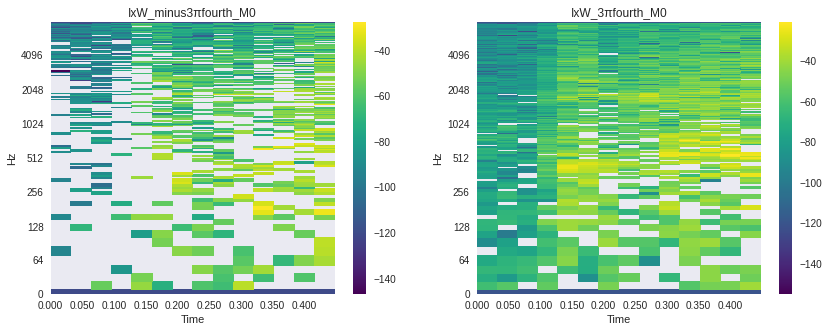

In [ ]:
IxW_minus3πfourth_M0, IxW_3πfourth_M0 = featureExtractorSubArrays(p_1, p_0, p_3)
# Inspect one feature
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
librosa.display.specshow(20*np.log10(IxW_minus3πfourth_M0[30] + 1e-6), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar()
plt.title('IxW_minus3πfourth_M0')
plt.subplot(1,2,2)
librosa.display.specshow(20*np.log10(IxW_3πfourth_M0[30] + 1e-6), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar()
plt.title('IxW_3πfourth_M0')

B) case (2 shared)

1,2 form  the first-order DMA along the direction -π/4 and 3,2 along the direction -3π/4.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


Text(0.5, 1.0, 'IxW_minus3πfourth_M1')

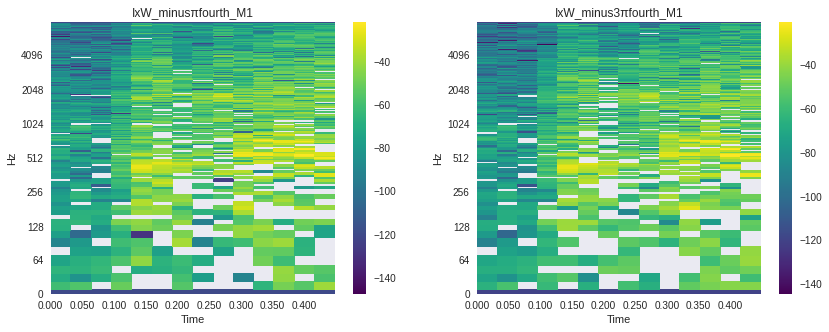

In [ ]:
IxW_minusπfourth_M1, IxW_minus3πfourth_M1 = featureExtractorSubArrays(p_2, p_1, p_0)
# Inspect one feature
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
librosa.display.specshow(20*np.log10(IxW_minusπfourth_M1[30] + 1e-6), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar()
plt.title('IxW_minusπfourth_M1')
plt.subplot(1,2,2)
librosa.display.specshow(20*np.log10(IxW_minus3πfourth_M1[30] + 1e-6), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar()
plt.title('IxW_minus3πfourth_M1')

C) case (3 shared)

2,3 form  the first-order DMA along the direction π/4 and 4,3 along the direction -π/4.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


Text(0.5, 1.0, 'IxW_minusπfourth_M2')

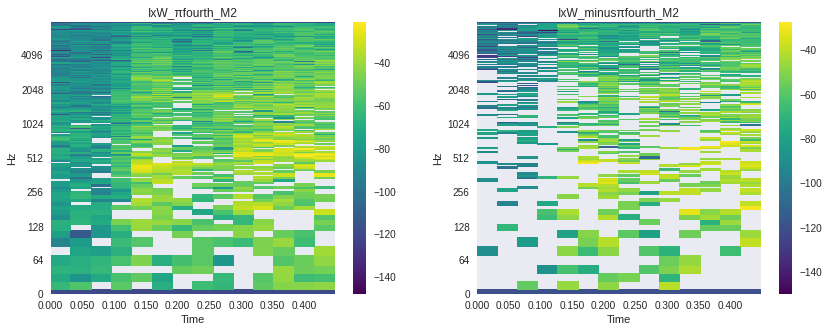

In [ ]:
IxW_πfourth_M2, IxW_minusπfourth_M2 = featureExtractorSubArrays(p_3, p_2, p_1)
# Inspect one feature
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
librosa.display.specshow(20*np.log10(IxW_πfourth_M2[30] + 1e-6), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar()
plt.title('IxW_πfourth_M2')
plt.subplot(1,2,2)
librosa.display.specshow(20*np.log10(IxW_minusπfourth_M2[30] + 1e-6), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar()
plt.title('IxW_minusπfourth_M2')

D) case (4 shared)

1,4 form  the first-order DMA along the direction π/4 and 3,4 along the direction 3π/4.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


Text(0.5, 1.0, 'IxW_3πfourth_M3')

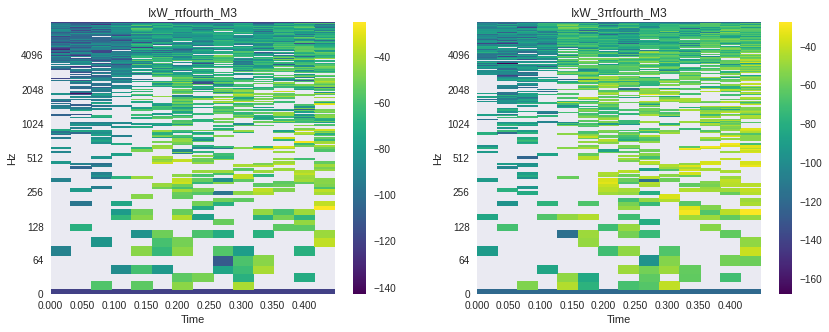

In [ ]:
IxW_πfourth_M3, IxW_3πfourth_M3 = featureExtractorSubArrays(p_0, p_3, p_2)
# Inspect one feature
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
librosa.display.specshow(20*np.log10(IxW_πfourth_M3[30] + 1e-6), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar()
plt.title('IxW_πfourth_M3')
plt.subplot(1,2,2)
librosa.display.specshow(20*np.log10(IxW_3πfourth_M3[30] + 1e-6), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar()
plt.title('IxW_3πfourth_M3')

In [ ]:
np.shape(IxW[i].T)

(14, 513)

In [ ]:
len(IxW[0])

513

In [ ]:
I_removed = IxW[0][1:1025]
print(len(I_removed))

512


In [ ]:
# Check on dimensionality

print(np.shape(IxW_πfourth_M3))
print(np.shape(IxW_πfourth_M3[0]))
#print(np.shape(IxW_πfourth_M3[1][1])
A = np.asarray(IxW_πfourth_M3)
print(np.shape(A))
print(np.shape(A[0].T))
AA = A[0].T
print(np.shape(AA))

(1203, 513, 14)
(513, 14)
(1203, 513, 14)
(14, 513)
(14, 513)


## Summary of the features

Since the SI features at zero frequency are equal to 0 and hence contain no source location information, the SI features at zero frequency are discarded.

Moreover, considering the conjugate symmetrix property of the Fourier Transform, it suffices to utilize only the SI features over the frequency bins of positive frequencies.

In [ ]:
## This Cell is not Used ##

print(np.shape(IxW_πfourth_M3))
print(np.shape(IxW_πfourth_M3[0]))
#print(np.shape(IxW_πfourth_M3[1][1])
A = np.asarray(IxW_πfourth_M3)
print(np.shape(A))
print(np.shape(A[0].T))
AA = A[0].T
print(np.shape(AA))

count = 0
A = np.asarray(IxW_πfourth_M3)
#for i in range(513):
#  if AA[0][i] < 0:
#    print('freq = {}'.format(AA[0][i]))
#    count = count + 1
#    print('counting count = {}'.format(count))
#    print('i = ', i)

#print('final count = {}'.format(count))

def keepPositive(I):
  I = np.asarray(I)
  IT = I.T

  #print(IT)
  #print(np.shape(IT))

  #print(IT[0])
  #print(np.shape(IT[0]))
  length0 = len(IT)
  II = []
  print('IT shape = ', np.shape(IT))
  print('IT[0] shape = ', np.shape(IT[0]))
  print('IT[0][0] = ', IT[0][0])
  for j in range(length0):
    length1 = len(IT[j])
    III = []
    for i in range(length1):
      if IT[j][i] > 0:
        III.append(IT[j][i])
    II.append(III)
  II = np.asarray(II)
  print('II shape = ', np.shape(II))
  print('III shape = ', np.shape(III))

  return II


(1203, 513, 14)
(513, 14)
(1203, 513, 14)
(14, 513)
(14, 513)


In [ ]:
IP = keepPositive(IxW[0])

IT shape =  (14, 513)
IT[0] shape =  (513,)
IT[0][0] =  0.0
II shape =  (14,)
III shape =  (133,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
def GammaCreator(Gamma, I1, I2, I3, I4, I5, I6, I7, I8, I9, I10):

  #I1 = keepPositive(I1)
  Gamma[:, :, 0] = I1[1:512].T
  #I2 = keepPositive(I2)
  Gamma[:, :, 1] = I2[1:512].T
  #I3 = keepPositive(I3)
  Gamma[:, :, 2] = I3[1:512].T
  #I4 = keepPositive(I4)
  Gamma[:, :, 3] = I4[1:512].T
  #I5 = keepPositive(I5)
  Gamma[:, :, 4] = I5[1:512].T
  #I6 = keepPositive(I6)
  Gamma[:, :, 5] = I6[1:512].T
  #I7 = keepPositive(I7)
  Gamma[:, :, 6] = I7[1:512].T
  #I8 = keepPositive(I8)
  Gamma[:, :, 7] = I8[1:512].T
  #I9 = keepPositive(I9)
  Gamma[:, :, 8] = I9[1:512].T
  #I10 = keepPositive(I10)
  Gamma[:, :, 9] = I10[1:512].T

  return Gamma


In [ ]:
np.shape(IxW[1])

(513, 14)

In [ ]:
np.shape(IP)

(14,)

In [ ]:
N = 14
M = 1024 # int(M/2 + 1) - 1
print(int(M/2) - 1)
C = 10
Gamma = np.empty([N, int(M/2) - 1, C], dtype = 'complex_')
Gamma_container = np.empty([signals_len, N, int(M/2) - 1, C], dtype = 'complex_')
int(M/2) - 1
for i in range(signals_len):
  Gamma_container[i] = GammaCreator(Gamma, IxW[i], IyW[i], IxW_minus3πfourth_M0[i], 
                                    IxW_3πfourth_M0[i], IxW_minusπfourth_M1[i], 
                                    IxW_minus3πfourth_M1[i], IxW_πfourth_M2[i], 
                                    IxW_minusπfourth_M2[i], IxW_πfourth_M3[i], 
                                    IxW_3πfourth_M3[i])
Gamma_container = Gamma_container[0:1200]

511


In [ ]:
np.shape(Gamma_container)

(1200, 14, 511, 10)

In [ ]:
class_names12 = ['0', '30', '60', '90', '120', '150', '180', '210', '240', '270', '300', '330']
class_names36 = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200', '210', '220', '230', '240', '250', '260', '270', '280', '290', '300', '310', '320', '330', '340', '350']


## Brief Data Exploration

In [ ]:
# training set shape:
print('Training set audio dimension:',str(Gamma.shape))
train_labels = np.asarray(train_labels)
print('Training set label dimension:',str(train_labels.shape))

# test set shape:
#print('Test set audio dimension:',str(test_audio.shape))
#print('Test set label dimension:',str(test_labels.shape))

Training set audio dimension: (14, 511, 10)
Training set label dimension: (1200,)


## Data Pre-Processing

Shouldn't we normalize the data in a range of 0 to 1 before feeding the data to the Neural Network model (?)

## Network Architecture

- Each convolutional layer uses 64 convolution kernels with the size of 3*3, to learn local correlations between local T-F regions.
- BN layer is used after each convolutional layer to improve the stability of the network and speed up the convergence of the network.
- The activation function of convolutional layers and fully connected layers is ReLU.
- Between the convolutional layer and the fully connected layer and after each fully connected layer, a droput procedure with rate 0.5 is used to avoid overfitting.
- size and number of convolutional kernels = . ? 
number of nodes in the fully connected layers = 512?.
- input = SI features
- The fully connected layer combines all the features extracted by the convolution layer to reduce the input 2D feature matrix to a 1D feature vector to facilitate the output layer for classification processing.
- SoftMax function is used to perform clssification
- The final source DOA is estimated by maximizing the posterior prbability 
- In the CNN training, the cross-entropy functon is used as the loss function
- We employ the Adam as the optimizer
- Initial learning rate is set to be 10^-3
- Maximum number of epochs = 100
- Early stopping with a patience of 10 epochs measured on the validation set is als used to prevent overfitting.



In [ ]:
filters = 64
kernel_size = (3,3)
strides = (1,1)
input_shape = (14, 511, 10)
rate = 0.5
K = 36 # Then we will try also with K = 36 or 12

model = keras.Sequential ([
  #keras.layers.Input(shape=input_shape),
  # input layer (14 * 511 * 10) (convolutional layers + batch normalization (BN) w ReLU)                     
  keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, activation='relu', input_shape=input_shape, padding='valid', data_format = 'channels_last', use_bias = True, name='conv1'),
  keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=False, scale=False, beta_initializer="zeros", gamma_initializer="ones", moving_mean_initializer="zeros", moving_variance_initializer="ones", beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None, name = 'bn1'),
  # 2nd convolutional layers + batch normalization (BN) w ReLU
  keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, activation='relu', padding='valid', data_format = 'channels_last', use_bias = True, name='conv2'),
  keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=False, scale=False, beta_initializer="zeros", gamma_initializer="ones", moving_mean_initializer="zeros", moving_variance_initializer="ones", beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None, name = 'bn2'),
  # dropout procedure with rate 0.5
  tf.keras.layers.Dropout(rate, noise_shape=None, seed=None, name = 'dn1'),
  # 1st fully connected layer w ReLU & dropout procedure with rate 0.5
  keras.layers.Flatten(name='flatten'),
  tf.keras.layers.Dense(512, activation = 'relu', name = 'fc1'),
  tf.keras.layers.Dropout(rate, noise_shape=None, seed=None, name = 'dn2'),
  # 2nd fully connected layer w ReLU & dropout procedure with rate 0.5
  tf.keras.layers.Dense(512, activation = 'relu', name = 'fc2'),
  tf.keras.layers.Dropout(rate, noise_shape=None, seed=None, name = 'dn3'),
  # SoftMax
  #tf.keras.layers.Softmax()
  tf.keras.layers.Dense(K, activation = 'softmax', name = 'output'),
])

# keras.layers.Flatten(name='flatten'),?


In [ ]:
# Let's show the architecture of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 12, 509, 64)       5824      
                                                                 
 bn1 (BatchNormalization)    (None, 12, 509, 64)       128       
                                                                 
 conv2 (Conv2D)              (None, 10, 507, 64)       36928     
                                                                 
 bn2 (BatchNormalization)    (None, 10, 507, 64)       128       
                                                                 
 dn1 (Dropout)               (None, 10, 507, 64)       0         
                                                                 
 flatten (Flatten)           (None, 324480)            0         
                                                                 
 fc1 (Dense)                 (None, 512)               1

## Compiling the Model

In [ ]:
learning_rate = 1e-3
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', # sparse?
              metrics='accuracy'
)

## Training the Model

In [ ]:
#y = model(Gamma_container)

In [ ]:
#y

<tf.Tensor: shape=(1200, 36), dtype=float32, numpy=
array([[0.02778087, 0.02773929, 0.02775192, ..., 0.02781815, 0.02773747,
        0.02776366],
       [0.02778099, 0.02773922, 0.02775169, ..., 0.02781831, 0.0277376 ,
        0.02776357],
       [0.0277812 , 0.0277395 , 0.02775175, ..., 0.02781872, 0.02773775,
        0.02776385],
       ...,
       [0.02778289, 0.0277825 , 0.02777459, ..., 0.02779731, 0.02777028,
        0.02778481],
       [0.02778288, 0.0277825 , 0.02777459, ..., 0.02779732, 0.02777027,
        0.02778479],
       [0.02778289, 0.0277825 , 0.02777459, ..., 0.02779732, 0.02777027,
        0.02778479]], dtype=float32)>

In [ ]:
model.fit(Gamma_container, labels30, epochs=100)

Epoch 1/100
188/188 [==============================] - 675s 4s/step - loss: 2.3998 - accuracy: 0.1373
Epoch 2/100
188/188 [==============================] - 669s 4s/step - loss: 2.2628 - accuracy: 0.1382
Epoch 3/100
188/188 [==============================] - 673s 4s/step - loss: 2.2423 - accuracy: 0.1435
Epoch 4/100
188/188 [==============================] - 666s 4s/step - loss: 2.2242 - accuracy: 0.1507
Epoch 5/100
188/188 [==============================] - 662s 4s/step - loss: 2.2200 - accuracy: 0.1452
Epoch 6/100
188/188 [==============================] - 671s 4s/step - loss: 2.2110 - accuracy: 0.1460
Epoch 7/100
188/188 [==============================] - 666s 4s/step - loss: 2.2079 - accuracy: 0.1535
Epoch 8/100
188/188 [==============================] - 667s 4s/step - loss: 2.2098 - accuracy: 0.1498
Epoch 9/100
188/188 [==============================] - 664s 4s/step - loss: 2.2068 - accuracy: 0.1368
Epoch 10/100
188/188 [==============================] - 661s 4s/step - loss: 2.207

In [ ]:
%cd /content/drive/MyDrive/Github/CNN_DOA/model/

/content/drive/.shortcut-targets-by-id/1-B6wbQJimyIAQNh3Ccp578yl6uudDF9j/CNN_DOA/model


In [ ]:
## Saving the model
model.save('modelRes30')

INFO:tensorflow:Assets written to: modelRes30/assets


In [ ]:
## If I want to load the model 
model = keras.models.load_model('/content/drive/MyDrive/Github/CNN_DOA/')

OSError: ignored

## Evaluating Accuracy

In [ ]:
%cd /content/drive/MyDrive/Github/CNN_DOA/model

/content/drive/.shortcut-targets-by-id/1-B6wbQJimyIAQNh3Ccp578yl6uudDF9j/CNN_DOA/model


In [ ]:
## If I want to load the model 
model = keras.models.load_model('modelRes30')

In [ ]:
%cd /content/drive/MyDrive/Github/CNN_DOA/Dataset/TEST/RES30

/content/drive/.shortcut-targets-by-id/1-B6wbQJimyIAQNh3Ccp578yl6uudDF9j/CNN_DOA/Dataset/TEST/RES30


In [ ]:
# Get list of audio files in the current folder
audiofiles_test = [str(file) for file in Path().glob('SA*.wav')]
#print((audiofiles_test))

# Diminuisco un attimo la dimensione del dataset per gestirlo più velocemente
#audiofiles_test = audiofiles_test[:100]

sr = 16000
duration = 0.5

testAudioMatrix, testSourceIDs, testLabels30, testLabels10 = extractAudiodata(audiofiles_test, sr*duration) # Full load took 14 mins

100%|██████████| 120/120 [00:01<00:00, 112.14it/s]


In [ ]:
# Checking correct labeling
for i in range(0, 10):
  print('{} with id {}: \n Label resolution 30° --> {}     Label resolution 10° --> {}'.format(audiofiles_test[i*4], int(testSourceIDs[i]), int(testLabels30[i]), int(testLabels10[i])))

SA0-A-0-0-0.wav with id 0: 
 Label resolution 30° --> 0     Label resolution 10° --> 0
SA4-A-1-0-0.wav with id 1: 
 Label resolution 30° --> 0     Label resolution 10° --> 0
SA8-A-2-0-0.wav with id 2: 
 Label resolution 30° --> 0     Label resolution 10° --> 0
SA12-A-3-0-0.wav with id 3: 
 Label resolution 30° --> 0     Label resolution 10° --> 0
SA16-A-4-0-0.wav with id 4: 
 Label resolution 30° --> 0     Label resolution 10° --> 0
SA20-A-5-0-0.wav with id 5: 
 Label resolution 30° --> 0     Label resolution 10° --> 0
SA24-A-6-0-0.wav with id 6: 
 Label resolution 30° --> 0     Label resolution 10° --> 0
SA28-A-7-0-0.wav with id 7: 
 Label resolution 30° --> 0     Label resolution 10° --> 0
SA32-A-8-0-0.wav with id 8: 
 Label resolution 30° --> 0     Label resolution 10° --> 0
SA36-A-9-0-0.wav with id 9: 
 Label resolution 30° --> 0     Label resolution 10° --> 0


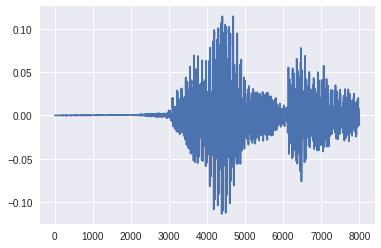

In [ ]:
ipd.display(ipd.Audio(testAudioMatrix[:,0,0], rate=sr))
plt.plot(testAudioMatrix[:,0,0])

In [ ]:
testAudioMatrix.shape
datapointsNum = testAudioMatrix.shape[-1]
Gamma_container = np.zeros([datapointsNum, 14, 511, 10])
print(Gamma_container.shape)

for i in tqdm(range(0, datapointsNum)):
  Gamma_container[i,:,:,:] = featureExtractor2(testAudioMatrix[:,:,i])

(120, 14, 511, 10)
(14, 511, 10)
[-0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.] --> [-0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.] --> [-0.  0.  0. -0.  0.  0. -0.  0.  0. -0.  0. -0.  0.  0.]
[-0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0. -0.  0.  0.] --> [ 0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0.  0. -0.]
[-0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.] --> [-0.  0.  0. -0.  0.  0. -0.  0.  0. -0.  0. -0.  0.  0.]
[ 0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.] --> [ 0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0.  0. -0.]
(14, 511, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] --> [ 0.  0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0. -0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] --> [ 0. -0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] --> [-0.  0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0.  0. -0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

/usr/local/lib/python3.7/dist-packages/librosa/util/utils.py:200: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  "on a non-contiguous input. This will result in a copy.".format(axis)


[-0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0.] --> [ 0. -0. -0.  0.  0.  0. -0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.] --> [-0.  0.  0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
(14, 511, 10)
[-0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0.  0.] --> [-0. -0.  0.  0.  0. -0.  0. -0.  0. -0.  0.  0.  0.  0.]
[ 0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0.  0.  0. -0.] --> [-0. -0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0.]
[-0. -0. -0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0.  0.] --> [ 0.  0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0.]
[ 0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0.] --> [-0. -0.  0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0.]
[-0.  0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.] --> [ 0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.]
(14, 511, 10)
[-0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] --> [ 0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.

In [ ]:
type(Gamma_container)

numpy.ndarray

In [ ]:
# Check how model performs on test dataset
test_loss, test_acc = model.evaluate(Gamma_container,  testLabels30, verbose=2)

print('\nTest accuracy:', test_acc)

4/4 - 2s - loss: 3.0971 - 2s/epoch - 553ms/step

Test accuracy: 3.0970585346221924


## Predictions

In [ ]:
# Predictions over test set
predictions = model.predict(test_audio)

# Show result
audio_idx = 0 # Idx of image
print('Model output:',predictions[audio_idx])
print('Predicted label:', np.argmax(predictions[audio_idx]))
print('Ground truth label:',test_labels[audio_idx])

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
num_rows = 5
num_cols = 3
num_audio = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_audio):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_audio)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()